param_num: 281610
[0, 0.5578216552734375, 2.315643310546875, 4.073464965820312, 5.831286621093749, 7.589108276367186, 9.346929931640624, 11.10475158691406, 12.862573242187498, 14.620394897460935, 16.378216552734372, 18.13603820800781, 19.89385986328125, 21.65168151855469, 23.409503173828128, 25.167324829101567, 26.925146484375006, 28.682968139648445, 30.440789794921884, 32.19861145019532, 33.95643310546876, 35.7142547607422, 37.47207641601564, 39.22989807128908, 40.98771972656252, 42.745541381835956, 44.503363037109395, 46.261184692382834, 48.01900634765627, 49.77682800292971, 51.53464965820315, 53.29247131347659, 55.05029296875003, 56.80811462402347, 58.565936279296906, 60.323757934570345, 62.081579589843784, 63.83940124511722, 65.59722290039066, 67.3550445556641]
param_num: 3182090
[0, 6.5132904052734375, 27.426580810546874, 48.33987121582031, 69.25316162109374, 90.16645202636718, 111.07974243164062, 131.99303283691407, 152.9063232421875, 173.81961364746095, 194.7329040527344, 215.64

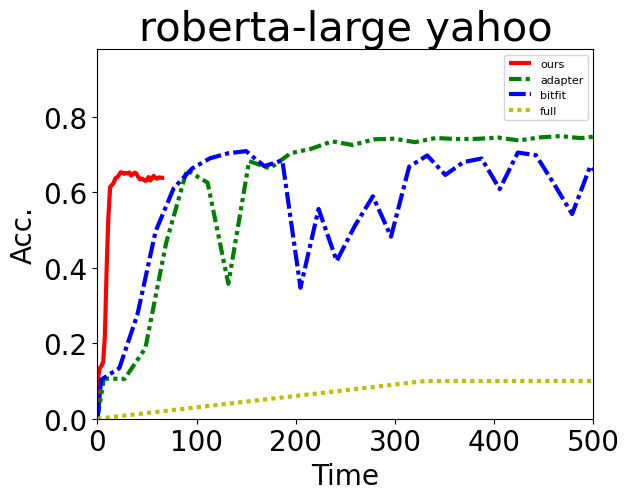

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yahoo"
model = "roberta-large"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedFwd_roberta-large_yahoo_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":1,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()

param_num: 281610
[0, 2.6578216552734375, 14.915643310546875, 27.173464965820312, 39.43128662109375, 51.689108276367186, 63.946929931640625, 76.20475158691406, 88.46257324218749, 100.72039489746092, 112.97821655273435, 125.23603820800778, 137.49385986328122, 149.75168151855465, 162.00950317382808, 174.2673248291015, 186.52514648437494, 198.78296813964837, 211.0407897949218, 223.29861145019524, 235.55643310546867, 247.8142547607421, 260.07207641601553, 272.329898071289, 284.58771972656245, 296.8455413818359, 309.1033630371094, 321.36118469238284, 333.6190063476563, 345.87682800292976, 358.1346496582032, 370.3924713134767, 382.65029296875014, 394.9081146240236, 407.16593627929706, 419.4237579345705, 431.681579589844, 443.93940124511744, 456.1972229003909, 468.45504455566436]
param_num: 3182090
[0, 6.5132904052734375, 27.426580810546874, 48.33987121582031, 69.25316162109374, 90.16645202636718, 111.07974243164062, 131.99303283691407, 152.9063232421875, 173.81961364746095, 194.7329040527344

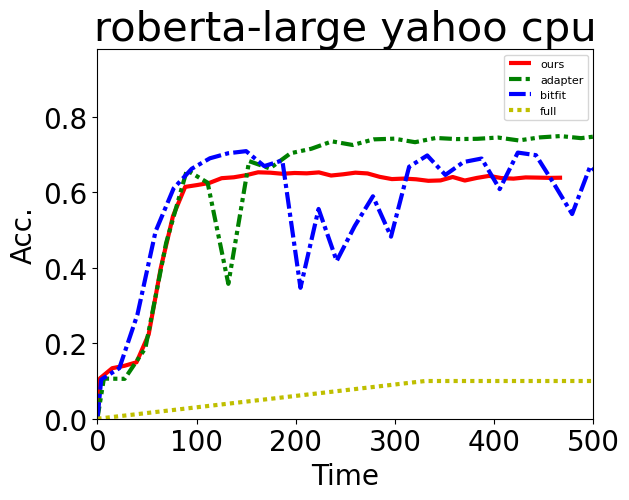

In [2]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yahoo"
model = "roberta-large"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedFwd_roberta-large_yahoo_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yahoo/fedsgd_roberta-large_yahoo_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":8,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset} cpu",fontsize=30)
plt.show()